<a href="https://colab.research.google.com/github/RodrigoMarquesP/Image_classification_with_CNNs_using_VGGNet/blob/main/Image_classification_with_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Why classify images anyway?***

Image classification is the first step into computer vision: for humans or machines, labeling its perceptions is necessary for understanding the environment, as well as taking decisions and actions in it.

<p align="center">
<img src="https://raw.githubusercontent.com/RodrigoMarquesP/Image_classification_with_CNNs_using_VGGNet/main/files/Observation.jpg">
</p>

By giving vision to a computer, with the ability to "comprehend" it, any visual task can be automated, easily overcoming human capabilities. There are already lots of registries in the medical field of visual recognition tasks made better by artificial-intelligences. This article shows some of them:

*   [Computer Vision Is Transforming Medicine](https://www.linkedin.com/pulse/how-computer-vision-transforming-medicine-margaretta-colangelo/)


Definitely, it is not just in the medical area! Take just one minute of search in any field you like, and you will found AI visual applications revolutionizing it.








# ***How to classify an image***

The deep learning approach is to train a network for understanding the differences between some classes of images.

For doing so, there are a lot of different neural network architectures, including the most simple one: some [tf.keras.layers.Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) layers with softmax output for the direct probability of each class. Even working, this approach brings many issues:


*   Slow training;
*   Low performance;
*   Very biased to the dataset;
*   Ignores spatial relations;
*   Can't distinguish between different features.

&rarr; To summarize: a standard network can't solve real-world computer vision problems.


# ***Convolutional Neural Network - CNN***

The core of modern computer vision algorithms often is the **Convolutional Neural Network** or **CNN**. The reason for it is the way it "comprehends" each image: not just an array of numbers, but a bunch of hierarchical and spatial features.

<p align="center">
<img src="https://raw.githubusercontent.com/RodrigoMarquesP/Image_classification_with_CNNs_using_VGGNet/main/files/feature_levels.png">
</p>

Yes, it makes all the difference. The network won't simply extract the distribution of the data but the distribution of its features and their spatial relations, which is way closer to what humans do.

<p align="center">
<img src="https://raw.githubusercontent.com/RodrigoMarquesP/Image_classification_with_CNNs_using_VGGNet/main/files/almost_human.gif">
</p>

Therefore, if two images share a lot of features, they're probably the same class. It allows the network to deal well with many possible problems:

*   Viewpoint variation;
*   Illumination conditions;
*   Scale variation;
*   Deformation;
*   Occlusion;
*   Background clutter;
*   Intra-class variation;


## ***The convolution operation***

Remember the key idea: comprehend features instead of just pixels. But how does a network do it? It uses the convolutional operation, which is implemented by [tf.keras.layers.Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D).

First of all, instead of connecting every input to a neuron, we connect just a patch:

<p align="center">
<img src="https://raw.githubusercontent.com/RodrigoMarquesP/Image_classification_with_CNNs_using_VGGNet/main/files/patch.jpg">
</p>

The patches are selected by a sliding window that takes n-pixels steps to capture the next patches. '*n*' is a parameter of the layer.

This allows each neuron to capture a single part of the image, and through the weights, transform it into a feature representation. The captured feature depends on the weights, and because of that, the set of weights is called a filter. A single filter applied to all patches is called **convolution operation** and generates a **feature map**.

Passing through different filters capture different features, such as white spots, black spots, horizontal lines, vertical lines, etc. By doing so, we generate a feature map for each desired feature: a volume of images or a data cube.

Thus, the size of the convolutional layer output will be (**n**, **m**, **f**), being **n**x**m** the size of the image, and **f** the number of features.



### *Activation Function*

To deal with non-linear data, we must have non-linear activations. The most used is the ReLu (rectified linear unit). This activation returns the number itself if it is positive, and zero if it is negative.


<p align="center">
<img src="https://raw.githubusercontent.com/RodrigoMarquesP/Image_classification_with_CNNs_using_VGGNet/main/files/relu.png" width=500>
</p>





## ***The pooling operation***

To deal with size differences, the pooling operation is responsible for reducing the dimensionality of its input, compressing the feature representations. This operation requires an order of resizing, ex:

*   If the order is 4, the feature map will be partitioned in 4-pixels pieces, where each piece will be transformed in just one pixel after the operation.

A widely used pooling operation is the **Max Pooling**: for each patch, get the higher. It is implemented by [tf.keras.layers.MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D).

<p align="center">
<img src="https://raw.githubusercontent.com/RodrigoMarquesP/Image_classification_with_CNNs_using_VGGNet/main/files/pooling.png" width=500>
</p>


## ***Improvements***

We can train faster and even have better results applying some improvements to our network. In this specific project i will use two:


*   [tf.keras.layers.BatchNormalization](https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization)
*   [tf.keras.layers.Dropout](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)





### *Batch Normalization*

As we train our network, the data distribution changes along layers and along the training process. We can normalize the dataset, but inside the network it will be very different. To solve it we can normalize the values internally. The normalization of the internal values of the network provides faster training, makes it less noisy, and lower the chances of overfitting.

The Batch Normalization layer is this internal normalization solution. It normalizes its inputs with mean zero and standard deviation equals to one(μ=0,σ=1). It can be placed along the sequence in many places as we will see below.

<p align="center">
<img src="https://raw.githubusercontent.com/RodrigoMarquesP/Image_classification_with_CNNs_using_VGGNet/main/files/batch_normalization.png" width=500>
</p>



### *Dropout*

During training, a layer can learn to correct the errors of previous layers, which result in layers don't working as they supposed to. This means that the network is memorizing the data, it is, overfitting.

A widely used technique to bypass it is the **dropout layer**. It determines that the neurons of a layer have a probability of being turned off during training:

<p align="center">
<img src="https://raw.githubusercontent.com/RodrigoMarquesP/Image_classification_with_CNNs_using_VGGNet/main/files/dropout.gif" width=500>
</p>


The consequences are:

1.   As there are always some turned off neurons, the rest of them needs to take responsability for the results of the network;
2.   As the turned off neurons always change, every neuron ends up taking responsability for the result;

Using dropout layers requires more time for training but helps the network be generalist (to not overfit).






## ***Results delivering***

<p align="center">
<img src="https://raw.githubusercontent.com/RodrigoMarquesP/Image_classification_with_CNNs_using_VGGNet/main/files/deliver_results.gif">
</p>

The convolution and pooling operations can be repeated (CONV->POOL->CONV->POOL->...CONV->POOL->) to form what is called **feature learning** segmentation. However, how to use these feature representations to predict the input image class?

Now that we are acting above the features instead of just pixels, we can use dense layers to output the probability distribution of each class. The [softmax activation](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) of the last dense layer will give us a number between 0 and 1 for each label, being the predicted probability of it. Thus, we can take the argument as the network prediction.

# ***The implementation***

Before even starting the project, go to the run option in the toolbar and set the environment to GPU to accelerate the computations. After that, let's import our dependencies:

In [ ]:
# ensuring the tensorflow version
%tensorflow_version 2.x

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# to configure the figure's format
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# to change the plot's style
plt.style.use('fivethirtyeight')

## ***The dataset: fashion MNIST***

**Fashion MNIST** is a standard dataset for deep learning computer vision applications. **MNIST** is a hand-writing digit widely known dataset, and the **Fashion MNIST** is its "clothes version".

It contains 70 thousand images of ten different classes, where 60 thousand are for training and 10 thousand for testing. The classes are:

Label | Class 
--- | --- 
0 | T-shirt/top
1 | Trouser
2 | Pullover
3 | Dress
4 | Coat
5 | Sandal
6 | Shirt
7 | Sneaker
8 | Bag
9 | Ankle boot

And they look like this:

<p align="center">
<img src="https://raw.githubusercontent.com/RodrigoMarquesP/Image_classification_with_CNNs_using_VGGNet/main/files/dataset_view.png" width=400>
</p>

We can load it directly from [tf.keras.datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets):



[[  0   0   0   0   0   0   0   0   0   0   0   0   0 193 228 218 213 198
  180 212 210 211 213 223 220 243 202   0]
 [  0   0   0   0   0   0   0   0   0   1   3   0  12 219 220 212 218 192
  169 227 208 218 224 212 226 197 209  52]
 [  0   0   0   0   0   0   0   0   0   0   6   0  99 244 222 220 218 203
  198 221 215 213 222 220 245 119 167  56]
 [  0   0   0   0   0   0   0   0   0   4   0   0  55 236 228 230 228 240
  232 213 218 223 234 217 217 209  92   0]
 [  0   0   1   4   6   7   2   0   0   0   0   0 237 226 217 223 222 219
  222 221 216 223 229 215 218 255  77   0]]


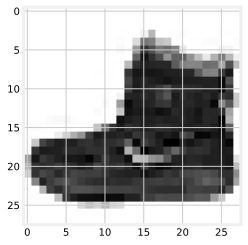

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# We can look at the image and its corresponding array
plt.imshow(X_train[0], cmap=plt.cm.binary)
print(X_train[0][10:][:5])  # a slice of the image

## ***Data preprocessing***

This dataset is already clean and balanced. Thereby we don't need to work on those topics. However, we can see that the data is in (0, 255) scale. Such magnitude can diverge the training process, which can be easily solved by normalizing the data. Another preparation that we need is to use the float32 type instead of float64 (the default) because of the TensorFlow requirements.

In [ ]:
X_train = (X_train/255.).astype("float32")
X_test = (X_test/255.).astype("float32")

To inject our data into the network, we need to put it on the 4-dimensional shape that TensorFlow requires:


```
(Number os instances, width, height, channels)
```

Which in our case is:

```
(Number os instances, 28, 28, 1)
```


In [ ]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

## ***The model***

Now it is time to bring together everything we talked about and build the model. This project will use an adapted version of the VGGNet architecture, designed by [Adrian Rosebrook](https://www.linkedin.com/in/adrian-rosebrock-59b8732a/). Let's take a look at it:

<p align="center">
<img src="https://raw.githubusercontent.com/RodrigoMarquesP/Image_classification_with_CNNs_using_VGGNet/main/files/model_architecture.png" width=1000>
</p>

For simplicity and better understanding, we will build the model with [tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential):







In [ ]:
model = tf.keras.Sequential()

# First convolutional and pooling set
model.add(tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.BatchNormalization(axis=1))
model.add(tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(tf.keras.layers.BatchNormalization(axis=1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

# Second onvolutional and pooling set
model.add(tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(tf.keras.layers.BatchNormalization(axis=1))
model.add(tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(tf.keras.layers.BatchNormalization(axis=1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

# Classification set
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))  # 10 neurons because we have 10 labels

We can take a look at the model's structure.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        112       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        112       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        1

Now we can already compile our model, chosing the optimizer and the loss function:


*   As we maintained integer labels, we need to use [sparse_categorical_crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/sparse_categorical_crossentropy) loss.
*   A good optimizer to try is [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam), but feel free to try any other. You can find the full list at [the TensorFlow website](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/).

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

The last step is to fit the model.

In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5135 - accuracy: 0.8215 - val_loss: 0.3084 - val_accuracy: 0.8882
Epoch 2/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3269 - accuracy: 0.8821 - val_loss: 0.2533 - val_accuracy: 0.9069
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2873 - accuracy: 0.8969 - val_loss: 0.2469 - val_accuracy: 0.9082
Epoch 4/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2662 - accuracy: 0.9043 - val_loss: 0.2265 - val_accuracy: 0.9210
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2481 - accuracy: 0.9091 - val_loss: 0.2160 - val_accuracy: 0.9212
Epoch 6/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2377 - accuracy: 0.9146 - val_loss: 0.2618 - val_accuracy: 0.9066
Epoch 7/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2249 - accuracy: 0.9193 - val_loss: 0.2100 - val_accuracy:

## ***Results evaluation***

To see the training performance, we can plot the history list returned by the fit() function.

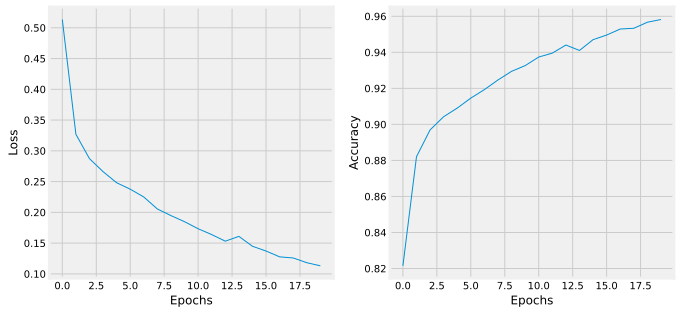

In [ ]:
loss = history.history['loss']
acc = history.history['accuracy']

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(loss, lw=1)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[1].plot(acc, lw=1)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
plt.show();

Apparently, our network learned its task well. However, we need to evaluate its results in a set of images that it has never seen before: the test set. For doing so, we need to predict using *X_test* and then compare the predictions with *y_test*.

In [ ]:
y_pred = model.predict(X_test)

# As every prediction is a vector of probabilities,
# we shall take the argmax for having the actual labels
y_pred = np.argmax(y_pred, axis=1)

# we can better visualize the performance with the classification_report
named_labels = ['T-shirt/top',
                'Trouser', 'Pullover',
                'Dress',
                'Coat',
                'Sandal',
                'Shirt',
                'Sneaker',
                'Bag',
                'Ankle boot']

print(classification_report(y_test, y_pred, target_names=named_labels))


              precision    recall  f1-score   support

 T-shirt/top       0.92      0.84      0.88      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.88      0.92      0.90      1000
       Dress       0.93      0.94      0.93      1000
        Coat       0.91      0.87      0.89      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.77      0.83      0.80      1000
     Sneaker       0.95      0.99      0.97      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



We reach 93% accuracy, which means that 93% of the time, our neural network can tell the right clothe it sees in the images. The network actually learned to identify our classes, WONDERFULL.

It isn't the sky, but it is pretty close, so let's celebrate.

<p align="center">
<img src="https://raw.githubusercontent.com/RodrigoMarquesP/Image_classification_with_CNNs_using_VGGNet/main/files/celebration.gif">
</p>